In [26]:
import cv2
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
import colorsys

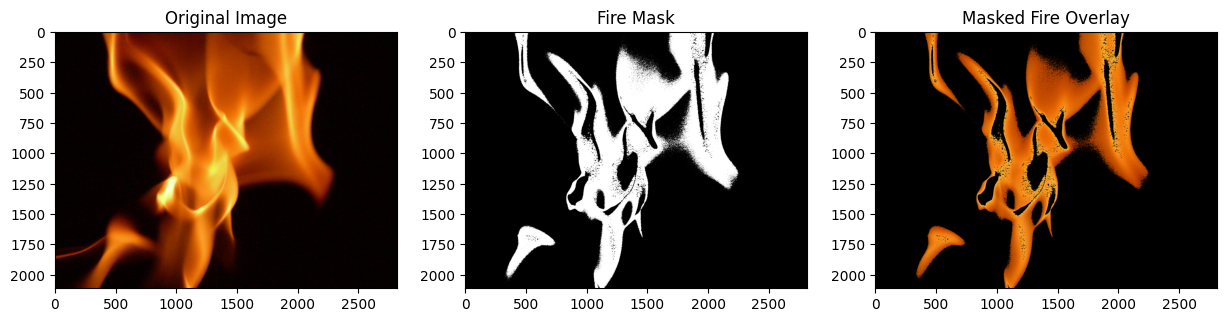

In [ ]:
image_path = "DancingFlames.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# Convert to LAB Color Space
lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
L, A, B = cv2.split(lab_img)

# Define Fire Detection Thresholds
L_lower, L_upper = 100.57, 204.50
A_lower, A_upper = 139.53, 184.07
B_lower, B_upper = 180.01, 201.76

# Create Individual Masks
L_mask = (L >= L_lower) & (L <= L_upper)
A_mask = (A >= A_lower) & (A <= A_upper)
B_mask = (B >= B_lower) & (B <= B_upper)

# Combine Masks
fire_mask = L_mask & A_mask & B_mask
fire_mask = fire_mask.astype(np.uint8) * 255  # Convert to binary (0-255)

# Apply Mask to Original Image
colored_fire = np.zeros_like(img)  # Create black image
colored_fire[fire_mask == 255] = img[fire_mask == 255]  # Keep fire pixels

# Display the Original, Mask, and Overlayed Image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(fire_mask, cmap="gray")
plt.title("Fire Mask")

plt.subplot(1, 3, 3)
plt.imshow(colored_fire)
plt.title("Masked Fire Overlay")

plt.show()

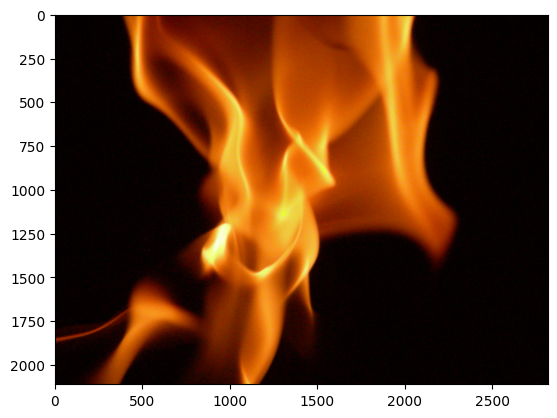

In [43]:
plt.imshow(img)

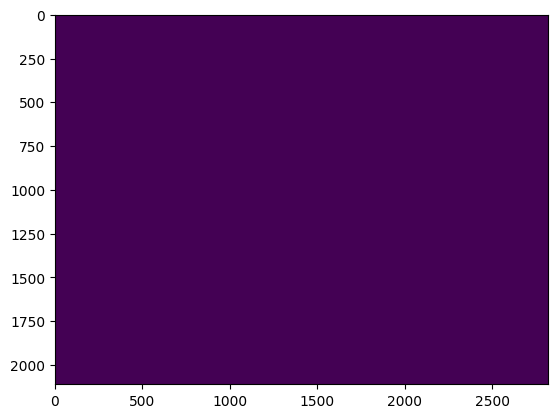

In [53]:
plt.imshow(final_mask)

In [49]:
mask

array([[[  2, 128, 129],
        [  1, 130, 129],
        [  1, 128, 129],
        ...,
        [  5, 128, 130],
        [  3, 128, 130],
        [  1, 128, 129]],

       [[  2, 128, 129],
        [  0, 130, 128],
        [  0, 128, 128],
        ...,
        [  3, 128, 130],
        [  2, 128, 130],
        [  1, 128, 129]],

       [[  2, 128, 129],
        [  1, 128, 129],
        [  1, 126, 129],
        ...,
        [  2, 128, 129],
        [  1, 128, 129],
        [  0, 128, 128]],

       ...,

       [[  0, 130, 127],
        [  0, 130, 127],
        [  1, 128, 129],
        ...,
        [  0, 128, 128],
        [  1, 126, 129],
        [  1, 128, 128]],

       [[  1, 130, 129],
        [  1, 130, 129],
        [  1, 128, 129],
        ...,
        [  0, 130, 128],
        [  0, 128, 128],
        [  1, 128, 129]],

       [[  2, 128, 129],
        [  1, 130, 129],
        [  1, 130, 129],
        ...,
        [  1, 128, 129],
        [  0, 130, 128],
        [  1, 130, 129]]